<a href="https://colab.research.google.com/github/Daniel-ASG/Imersao_dados_ALURA_2022/blob/main/Alura_Imersao_dados_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Dados 4ª edição

A Imersão Dados consiste em uma sequência de aulas oferecida pela Alura e parceiros com a finalidade de difundir o conhecimento em ciência de dados.

Nesta imersão foi utilizada uma base de dados 

## **Aula 01 - Imersão Dados 4ª edição**

### Importação de bibliotecas e algumas configurações

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_theme(style="whitegrid")


### Download da base de dados principal que será utilizada

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Daniel-ASG/Imersao_dados_ALURA_2022/main/dados_imoveis.csv')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB
None


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


### Análise exploratória

Nota-se que a base contém 10008 amostras e 8 variáveis.

A última coluna (Valor), deveria ser do tipo numérica mas é apresentada como texto (object). Para deixá-la compatível para a análise deve-se separar as informações de texto e convertê-la para o formato numérico. Por meio do método split, percebe-se que é possível dividir o conteúdo dessa coluna em 3 partes:

In [3]:
display(df.Valor.str.split(expand=True))
print('\n')
print(df.Valor.str.split(expand = True)[0].unique())
print(df.Valor.str.split(expand = True)[1].unique())
print(df.Valor.str.split(expand = True)[2].unique())

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês




['R$']
['7.000.000' '3.700.000' '380.000' ... '553.000' '951.000' '2.200']
[None '/Mês' '/Ano' '/Dia']


Inserimos essas 3 novas colunas no dataframe original:

In [4]:
df[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df.Valor.str.split(expand = True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


A partir do dataframe original, removemos as linhas cujos conteúdos da coluna "Tipo_anuncio" não são nulas. Isso se deve ao fato de que as informações relativas ao preço se tratam de valores cobrados periodicamente, não se tratando portanto de valores de venda. 

Em seguida:
- as colunas "Moeda" e "Tipo_anuncio" são removidas;
- a coluna "Valor_anuncio" é transformada no tipo inteiro;
- a coluna "Valor" é substituída por "Valor_anuncio";

In [57]:
# Criação de um novo DataFrame
df_vendas = df[df["Tipo_anuncio"].isnull()]
df_vendas["Valor"] = df_vendas["Valor_anuncio"].str.replace(".","").astype(int)
df_vendas.drop(columns=['Valor_anuncio', 'Moeda', 'Tipo_anuncio'], inplace=True)

# Reset dos índices para uso posterior
df_vendas.reset_index(inplace=True, drop=True)

print(df_vendas.info())
display(df_vendas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6107 non-null   object
 1   Bairro     9146 non-null   object
 2   Cidade     9156 non-null   object
 3   Metragem   9156 non-null   int64 
 4   Quartos    9156 non-null   int64 
 5   Banheiros  9156 non-null   int64 
 6   Vagas      9156 non-null   int64 
 7   Valor      9156 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 572.4+ KB
None


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000


#### teste para preencher a coluna Bairro e inserir lat/lon na base de dados


Em seguida temos as três primeiras colunas, com informações de texto, das quais as colunas "Rua" e "Bairro" apresentam alguns valores faltantes. Uma estratégia possível, com a finalidade de efetuar as previsões dos preços de imóveis com base nos bairros, será a de preencher a coluna de bairros a partir do conhecimento da rua dos imóveis em questão.

Foi criada uma função que recebe o nome da rua e retorna o bairro equivalente. Para isso foi utilizado o ***GeoPy***, um cliente Python que ajuda na localização de informações como coordenadas de endereços, cidades, países e pontos de referência em todo o mundo.


In [6]:
locator = Nominatim(user_agent='teste')
location = locator.geocode(df_vendas.Rua[0])
location.raw

{'place_id': 344521852,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 1099639442,
 'boundingbox': ['-23.604647300713',
  '-23.604547300713',
  '-46.652802892596',
  '-46.652702892596'],
 'lat': '-23.60459730071331',
 'lon': '-46.65275289259601',
 'display_name': '255, Avenida Itacira, Moema, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, 04060-000, Brasil',
 'class': 'place',
 'type': 'house',
 'importance': 0.21000000000000005}

In [15]:
locator = Nominatim(user_agent='teste')
def bairro(rua):
    location = locator.geocode(rua + ', São Paulo')
    location_raw = location.raw['display_name'].split(',')
    index = location_raw.index(' São Paulo')
    Bairro = location_raw[index-1].strip()
    
    return Bairro

Agora utilizamos a função criada para preencher os dados faltantes de bairro na base de dados.

In [64]:
for i in range(len(df_vendas)):
    if df_vendas.Bairro.isnull()[i] == True:
        df_vendas.Bairro[i] = bairro(df_vendas.Rua[i])

df_vendas.drop_duplicates(inplace=True)
df_vendas.reset_index(inplace=True, drop=True)

print(df_vendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        5760 non-null   object
 1   Bairro     8641 non-null   object
 2   Cidade     8641 non-null   object
 3   Metragem   8641 non-null   int64 
 4   Quartos    8641 non-null   int64 
 5   Banheiros  8641 non-null   int64 
 6   Vagas      8641 non-null   int64 
 7   Valor      8641 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 540.2+ KB
None


In [65]:
df_vendas['lat'] = pd.Series()
df_vendas['lon'] = pd.Series()

In [66]:
locator = Nominatim(user_agent='teste')

def lat_lon_rua(rua):
    location = locator.geocode(rua + ', São Paulo', timeout=10)
    if location == None:
        return [np.nan, np.nan]
    else:
        lat = float(location.raw['lat'])
        lon = float(location.raw['lon'])
        return [lat, lon];
    

def lat_lon_bairro(bairro):
    location = locator.geocode(bairro + ', São Paulo', timeout=10)
    if location == None:
        return [np.nan, np.nan]
    else:
        lat = float(location.raw['lat'])
        lon = float(location.raw['lon'])
        return [lat, lon];

In [ ]:
for i in range(len(df_vendas)):
    if (df_vendas.lat.isnull()[i] == True) and (df_vendas.lon.isnull()[i] == True):
        if df_vendas.Rua.isnull()[i] == True:
            df_vendas.lat[i] = lat_lon_bairro(df_vendas.Bairro[i])[0]
            df_vendas.lon[i] = lat_lon_bairro(df_vendas.Bairro[i])[1]
        else:
            df_vendas.lat[i] = lat_lon_rua(df_vendas.Rua[i])[0]
            df_vendas.lon[i] = lat_lon_rua(df_vendas.Rua[i])[1]
        # display(df_vendas.loc[i])
        # print(i)

In [74]:
df_vendas.to_csv('df_vendas_geo.csv', index=False)

Como esta etapa anterior é muito demorada, uma versão do DataFrame gerado foi salva para que seja possível continuar as análises a partir deste ponto sem a necessidade de gastar mais de 2 horas de espera. 

In [75]:
df_vendas = pd.read_csv('https://raw.githubusercontent.com/Daniel-ASG/Imersao_dados_ALURA_2022/main/df_vendas_geo.csv')
df_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,lat,lon
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,-23.60,-46.65
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,-23.64,-46.69
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,-23.75,-46.70
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,-23.47,-47.44
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,-23.55,-46.59


In [76]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        5760 non-null   object 
 1   Bairro     8641 non-null   object 
 2   Cidade     8641 non-null   object 
 3   Metragem   8641 non-null   int64  
 4   Quartos    8641 non-null   int64  
 5   Banheiros  8641 non-null   int64  
 6   Vagas      8641 non-null   int64  
 7   Valor      8641 non-null   int64  
 8   lat        8174 non-null   float64
 9   lon        8173 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 675.2+ KB


### Continuação da Análise exploratória

Preço do metro quadrado por bairro 

In [77]:
df_vendas['Preço/m²'] = df_vendas.Valor / df_vendas.Metragem
df_vendas.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,lat,lon,Preço/m²
4387,Praça Pinheiro da Cunha,Ipiranga,São Paulo,174,3,3,4,900000,-23.59,-46.62,5172.41
6518,NaN,Vila Nova Conceição,São Paulo,177,3,2,3,2875000,-23.05,-47.83,16242.94
4480,Rua Nestor Moreira,Jardim da Glória,São Paulo,239,3,1,2,1500000,-23.58,-46.62,6276.15
4433,NaN,Chácara Monte Alegre,São Paulo,459,3,5,3,3300000,-22.69,-46.68,7189.54
4533,NaN,Jardim Floresta,São Paulo,140,3,3,3,340000,-22.20,-48.78,2428.57


In [78]:
# describe para as variáveis numéricas
display(df_vendas.describe()) 

print('\n')

# describe para as variáveis de texto
display(df_vendas[["Rua", "Bairro", "Cidade"]].describe())

,Metragem,Quartos,Banheiros,Vagas,Valor,lat,lon,Preço/m²
count,8641.00,8641.00,8641.00,8641.00,8641.00,8174.00,8173.00,8641.00
mean,441.54,3.45,3.80,3.97,3078901.99,-23.36,-46.87,8024.57
std,8086.92,1.04,1.97,2.61,3981206.92,1.14,1.15,5304.81
min,10.00,1.00,1.00,1.00,13000.00,-30.90,-55.50,9.33
25%,168.00,3.00,2.00,2.00,890000.00,-23.61,-46.72,4756.76
50%,278.00,3.00,4.00,4.00,1800000.00,-23.58,-46.69,6521.74
75%,450.00,4.00,5.00,5.00,3500000.00,-23.53,-46.63,9514.93
max,750000.00,16.00,40.00,50.00,65000000.00,39.79,-8.29,80000.00


,Rua,Bairro,Cidade
count,5760,8641,8641
unique,3006,698,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,22,354,8641


In [79]:
df_media_Bairro = df_vendas.groupby('Bairro').mean().reset_index()
df_media_Bairro.sample(5)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor,lat,lon,Preço/m²
306,Jardim das Bandeiras,459.98,4.00,4.20,4.76,4871207.05,-23.55,-46.73,11067.09
132,Jardim Cidade Pirituba,137.50,3.00,2.00,2.00,457500.00,-23.48,-46.73,3511.33
416,Siciliano,223.25,3.00,3.00,3.00,1700000.00,-23.53,-46.70,7950.89
133,Jardim Cidalia,127.50,3.00,1.00,5.00,800000.00,NaN,NaN,6276.92
242,Jardim Raposo Tavares,160.00,1.00,1.00,2.00,500000.00,-23.59,-46.76,3125.00


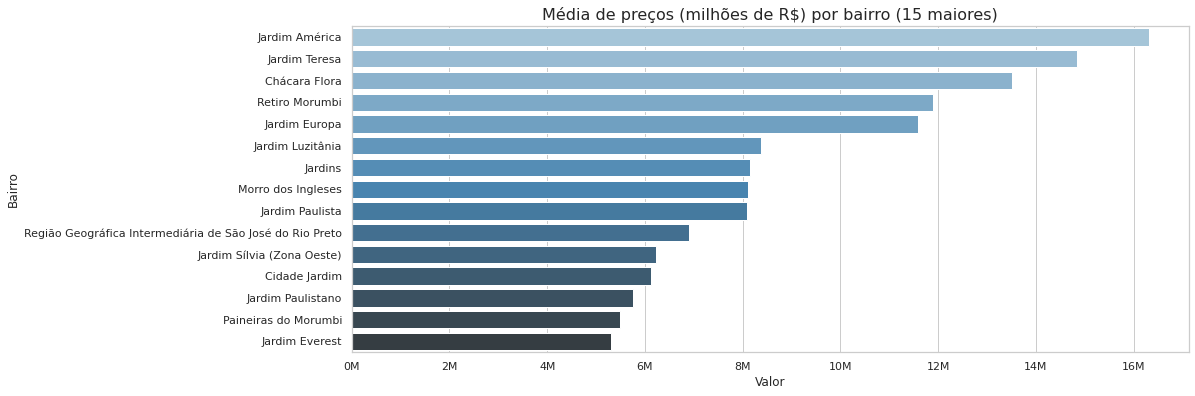

In [80]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_media_Bairro.sort_values(by=['Valor'], ascending=False).head(15), 
                 y='Bairro', x='Valor', palette="Blues_d")
ax.set_title('Média de preços (milhões de R$) por bairro (15 maiores)', fontsize=16)

xlabels = [f'{x:,.0f}' + 'M' for x in ax.get_xticks()/1E6]
ax.set_xticklabels(xlabels);

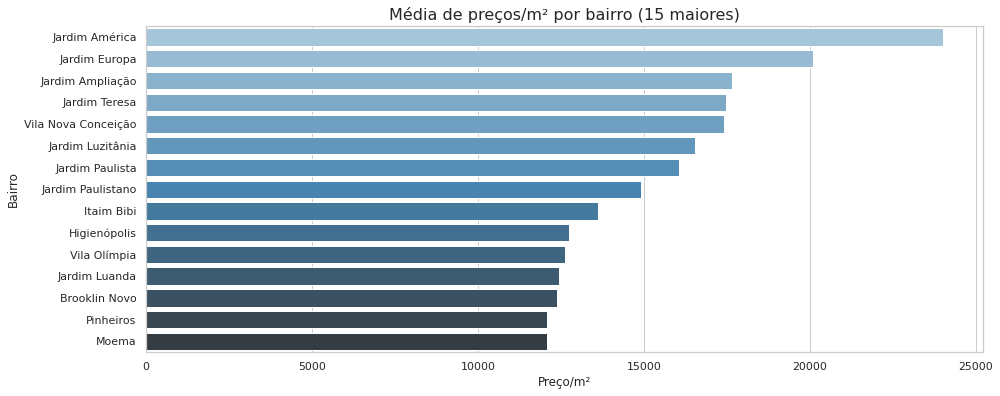

In [81]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_media_Bairro.sort_values(by=['Preço/m²'], ascending=False)[1:16],#.head(15), 
                 #  o primeiro valor foi removido pro se tratar de um valor discrepante
                 y='Bairro', x='Preço/m²', palette="Blues_d")
ax.set_title('Média de preços/m² por bairro (15 maiores)', fontsize=16);

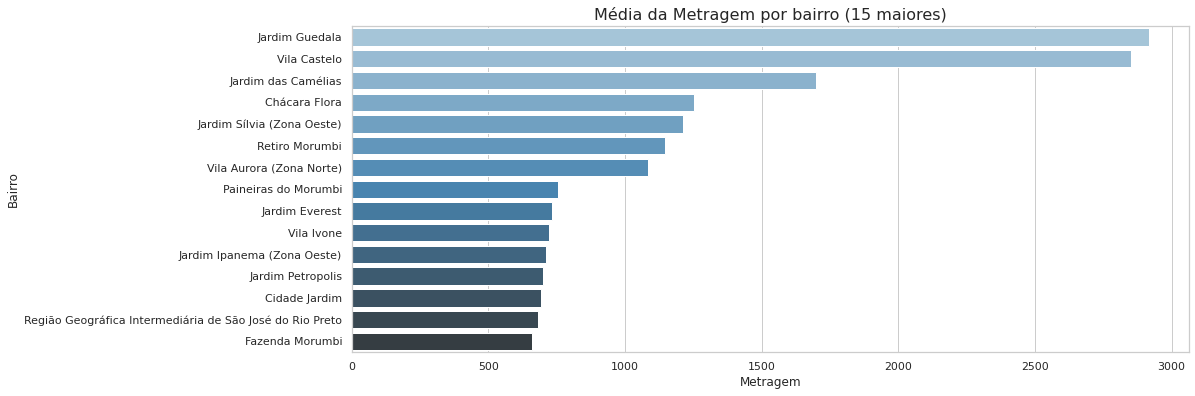

In [82]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_media_Bairro.sort_values(by=['Metragem'], ascending=False)[1:16],#.head(15), 
                 #  o primeiro valor foi removido por se tratar de um valor discrepante
                 y='Bairro', x='Metragem', palette="Blues_d")
ax.set_title('Média da Metragem por bairro (15 maiores)', fontsize=16);

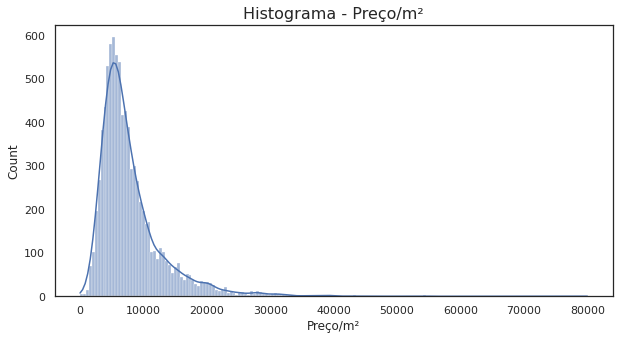

In [83]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="white")
ax = sns.histplot(data=df_vendas, x='Preço/m²', kde=True)
ax.set_title("Histograma - Preço/m²", fontsize=16);

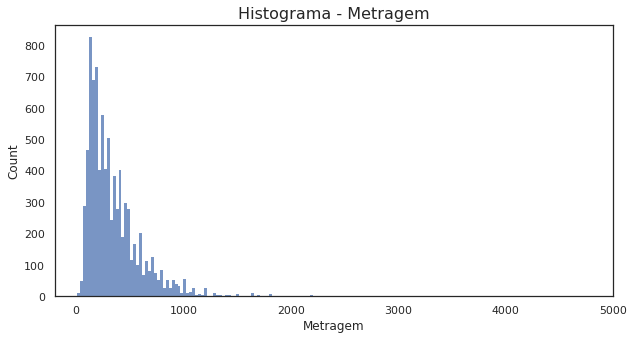

In [84]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df_vendas, x='Metragem')
ax.set_title("Histograma - Metragem", fontsize=16)
plt.xlim((-200, 5000));

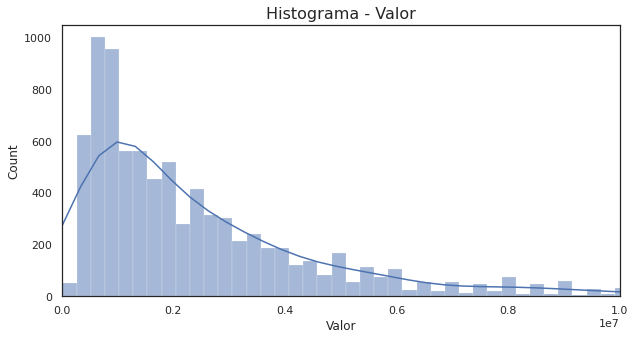

In [85]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df_vendas, x='Valor', kde=True)
ax.set_title("Histograma - Valor", fontsize=16)
plt.xlim((-50, 10000000));

In [86]:
# célula para visualização do dataset por bairro

sel_bairro = input('Digite o nome do Bairro: ')
df_vendas[df_vendas.Bairro == sel_bairro]

Digite o nome do Bairro: Planalto Paulista


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,lat,lon,Preço/m²
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,-23.60,-46.65,7000.00
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000,-23.63,-46.65,8760.00
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000,-23.60,-46.65,7554.35
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,670000,-22.33,-52.22,5630.25
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000,-23.61,-46.65,10070.00
...,...,...,...,...,...,...,...,...,...,...,...
8534,Alameda Tirió,Planalto Paulista,São Paulo,300,3,3,3,2600000,-23.60,-46.65,8666.67
8552,NaN,Planalto Paulista,São Paulo,200,3,3,3,680000,-22.33,-52.22,3400.00
8557,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,1550000,-23.63,-46.65,3827.16
8602,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,1500000,-23.61,-46.65,5725.19


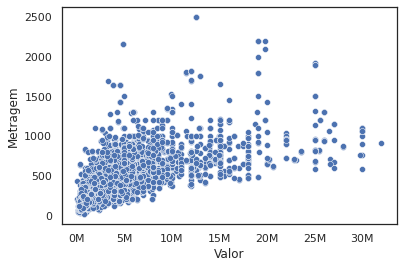

In [ ]:
g = sns.scatterplot(data=df_vendas.query('Metragem < 2600 & Valor < 35000000'), x='Valor', y='Metragem')
xlabels = [f'{x:,.0f}' + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

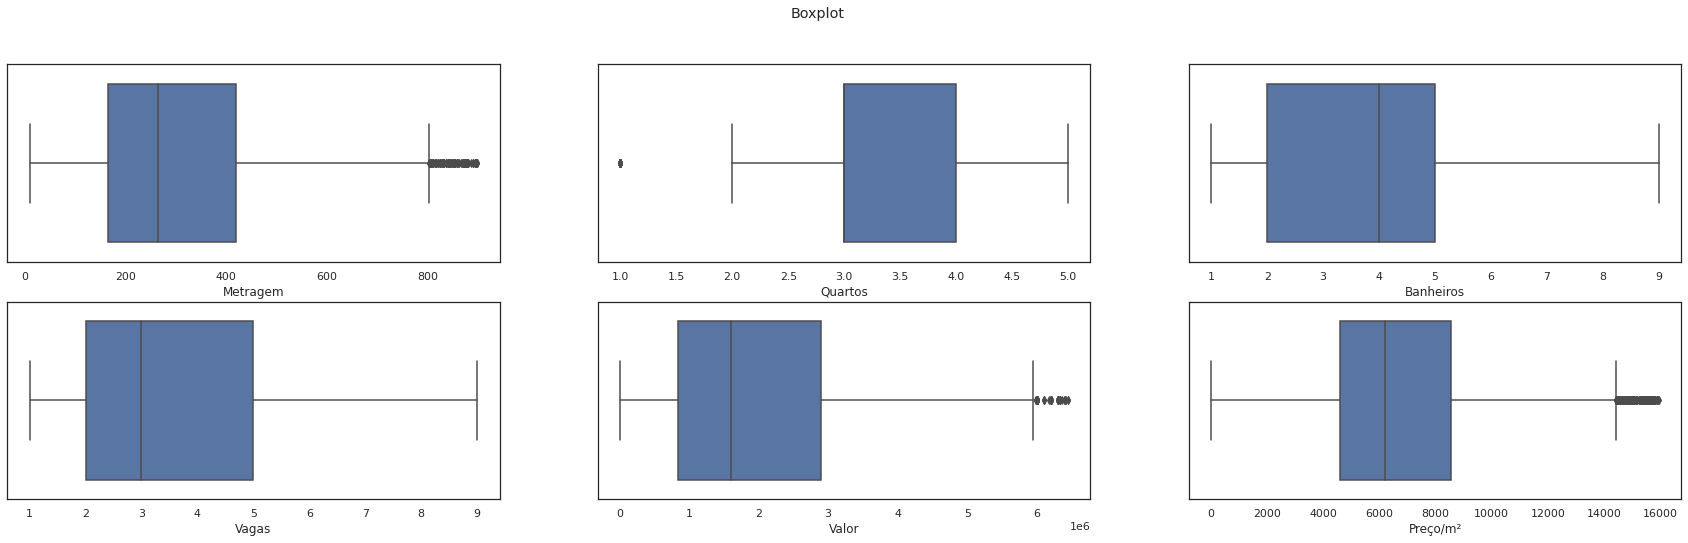

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 8))

fig.suptitle('Boxplot')

sns.boxplot(ax=axes[0][0], data=df_vendas.query('Metragem < 900'), x='Metragem')
sns.boxplot(ax=axes[0][1], data=df_vendas.query('Quartos < 6'), x='Quartos')
sns.boxplot(ax=axes[0][2], data=df_vendas.query('Banheiros < 10'), x='Banheiros')
sns.boxplot(ax=axes[1][0], data=df_vendas.query('Vagas < 10'), x='Vagas')
sns.boxplot(ax=axes[1][1], data=df_vendas.query('Valor < 6500000'), x='Valor')
sns.boxplot(ax=axes[1][2], data=df_vendas[df_vendas['Preço/m²'] < 16000], x='Preço/m²');

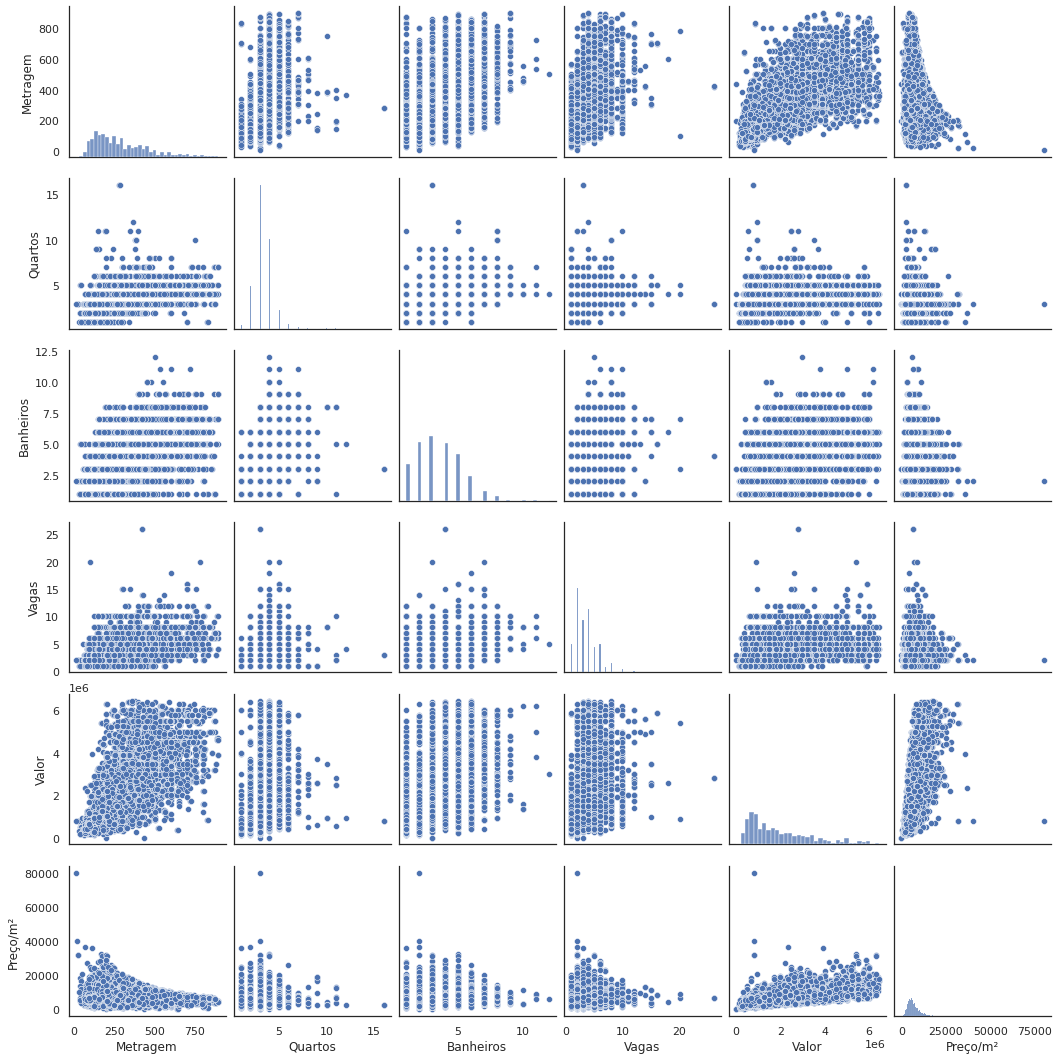

In [ ]:
sns.pairplot(df_vendas.query('Metragem < 900 & Banheiros < 40 & Vagas < 40 & Valor < 6500000'));

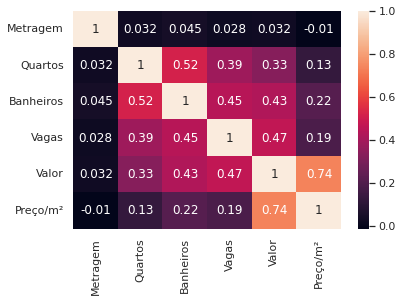

In [ ]:
sns.heatmap(df_vendas.corr(), annot=True);

In [ ]:
ibge_sp = pd.read_csv('https://gist.githubusercontent.com/esaheki/dedc519545db1ce5911174e8fcec8515/raw/acaafd5ecc45bbf70617ba36893a031ce9aa1d28/Basico_SP1.csv',
                         sep=';', thousands='.', decimal=',')
ibge_sp

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08,NaN
18359,355030896000244,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.49,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38,NaN
18360,355030896000245,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.54,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99,NaN
18361,355030896000246,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,4.21,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43,NaN


Dicionário de dados do IBGE

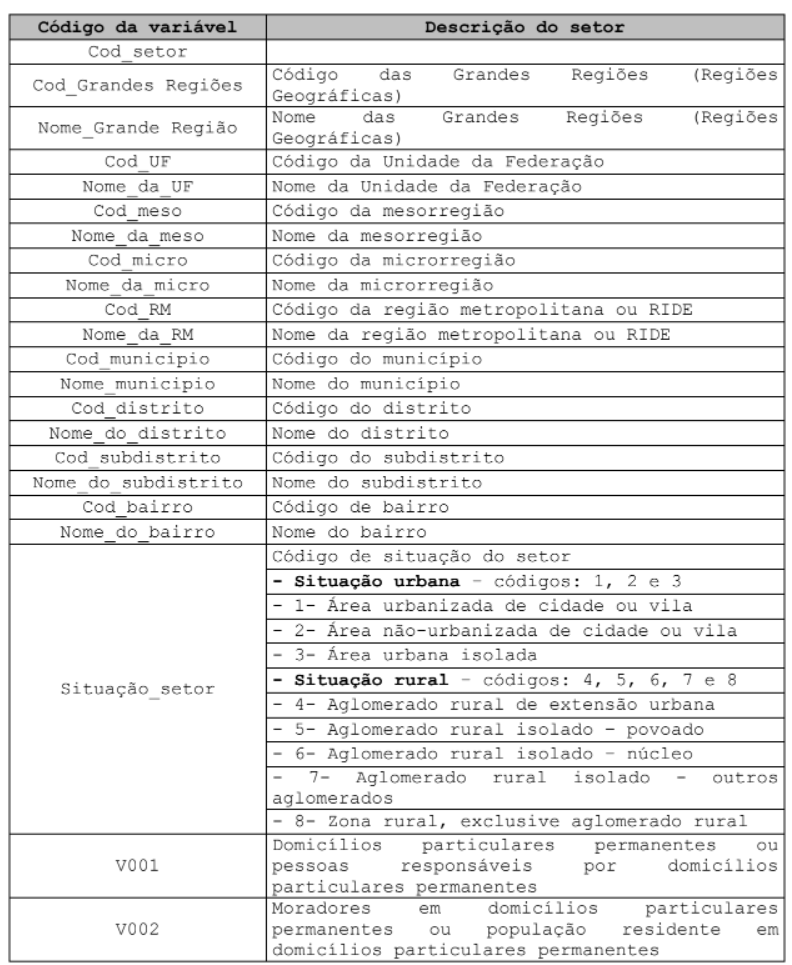
---
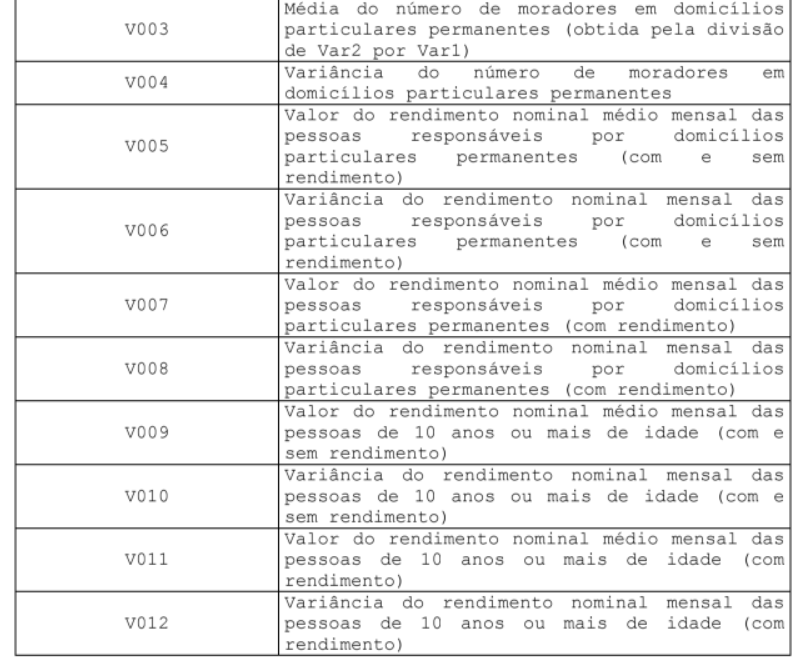